In [2]:
import keras
import numpy as np

In [3]:
import pickle

with open("testdataprocessed.pickle", "rb") as data:
    testdataprocessed = pickle.load(data)
    
with open("traindataprocessed.pickle", "rb") as data:
    traindataprocessed = pickle.load(data)
    
with open("testclasses.pickle", "rb") as data:
    testclasses = pickle.load(data)
    
with open("trainclasses.pickle", "rb") as data:
    trainclasses = pickle.load(data)

In [4]:
def stagger(data, classes, n):
    stagger_data = [
        data[i:i + 2 * n + 1]
        for i in range(0, len(data) - 2 * n)
    ]
    
    stagger_classes = classes[n:-n]
    
    stagger_data = np.array([np.concatenate(n) for n in np.array(stagger_data)])
    
    
    return stagger_data, stagger_classes

In [5]:
x = np.array(3 * [range(12)]).transpose()
print(x)

s_traindata, s_trainclasses = stagger(traindataprocessed, trainclasses, 20)
s_testdata, s_testclasses = stagger(testdataprocessed, testclasses, 20)

[[ 0  0  0]
 [ 1  1  1]
 [ 2  2  2]
 [ 3  3  3]
 [ 4  4  4]
 [ 5  5  5]
 [ 6  6  6]
 [ 7  7  7]
 [ 8  8  8]
 [ 9  9  9]
 [10 10 10]
 [11 11 11]]


In [6]:
s_traindata.shape

(169960, 20992)

In [7]:
model = keras.models.Sequential()

In [9]:
model.add(keras.layers.Dense(1024, activation='relu', input_shape=s_traindata[0].shape))


In [10]:
model.add(keras.layers.Dense(1024, activation='relu'))


In [11]:
model.add(keras.layers.Dense(1, activation='tanh'))

In [12]:
model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.sgd())

In [13]:
model.fit(s_traindata, 
          s_trainclasses,
          batch_size=200,
          epochs=30,
          verbose=1,
          validation_data=(s_testdata, s_testclasses))

Train on 169960 samples, validate on 9960 samples
Epoch 1/30
169960/169960 [==============================] - 20s - loss: 0.0325 - val_loss: 0.0364
Epoch 2/30
169960/169960 [==============================] - 18s - loss: 0.0228 - val_loss: 0.0361
Epoch 3/30
169960/169960 [==============================] - 18s - loss: 0.0217 - val_loss: 0.0369
Epoch 4/30
169960/169960 [==============================] - 18s - loss: 0.0209 - val_loss: 0.0374
Epoch 5/30
169960/169960 [==============================] - 18s - loss: 0.0206 - val_loss: 0.0352
Epoch 6/30
169960/169960 [==============================] - 18s - loss: 0.0203 - val_loss: 0.0353
Epoch 7/30
169960/169960 [==============================] - 18s - loss: 0.0198 - val_loss: 0.0354
Epoch 8/30
169960/169960 [==============================] - 18s - loss: 0.0198 - val_loss: 0.0356
Epoch 9/30
169960/169960 [==============================] - 18s - loss: 0.0193 - val_loss: 0.0351
Epoch 10/30
169960/169960 [==============================] - 18s - l

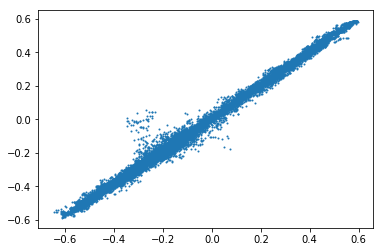

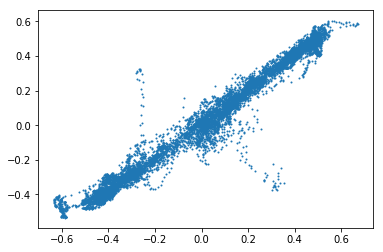

In [16]:
import matplotlib.pyplot as plt
plt.scatter(s_trainclasses[:20000].flatten() , model.predict(s_traindata[:20000]).flatten(), 1)
#plt.plot([-1, 1], [-1, 1])
plt.show()

import matplotlib.pyplot as plt
plt.scatter(s_testclasses[:20000].flatten() , model.predict(s_testdata[:20000]).flatten(), 1)
#plt.plot([-1, 1], [-1, 1])
plt.show()

In [70]:
s_traindata[0].shape

(10752,)

In [75]:
plt.plot(s_traindata[0])

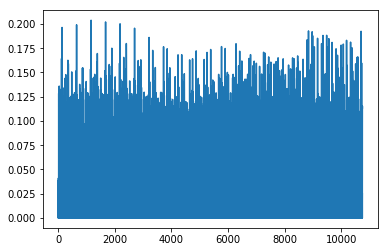

In [76]:
plt.show()

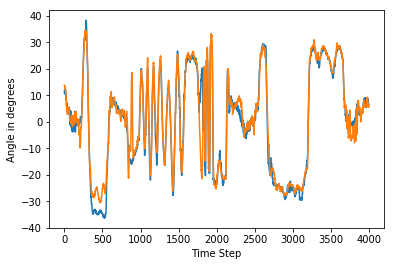

In [35]:

length = 4000
offset = 5000
plt.plot(s_testclasses[offset:offset + length] * 180 / np.pi)
plt.plot(model.predict(s_testdata[offset:offset + length]).flatten() * 180 / np.pi)
plt.ylabel("Angle in degrees")
plt.xlabel("Time Step")
plt.show()

In [14]:

length = 1000
offset = 3000
plt.plot(s_trainclasses[offset:offset + length])
plt.plot(model.predict(s_traindata[offset:offset + length]).flatten())
plt.show()

NameError: name 'plt' is not defined

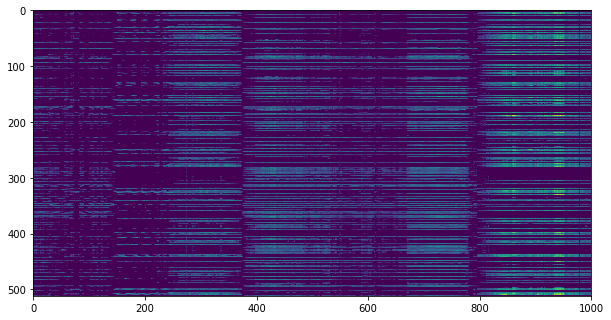

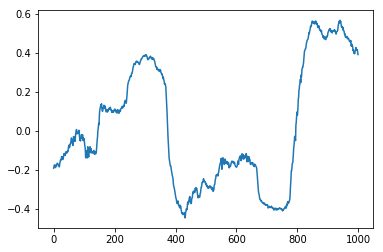

In [30]:
plt.imshow(traindataprocessed[1000:2000].transpose())
plt.show()
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.plot(trainclasses[1000:2000])
plt.show()

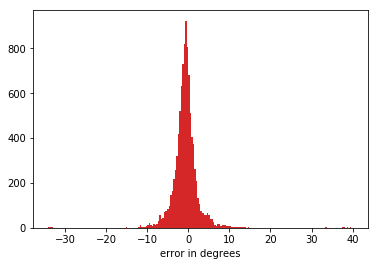

In [50]:

plt.hist(( s_testclasses- model.predict(s_testdata).flatten()) * 180 / np.pi, 200)
plt.xlabel("error in degrees")
plt.show()

In [ ]:
plt.hi